In [1]:
##   Load Packages
using BayesianNonparametricStatistics, Plots
using Statistics, Distributions
using DelimitedFiles, Plots, LaTeXStrings
using NBInclude, LinearAlgebra, SparseArrays
##   Colors
lblue = RGBA(83/255, 201/255, 250/255,0.7)
dblue = RGBA(47/255, 122/255, 154/255,0.7)

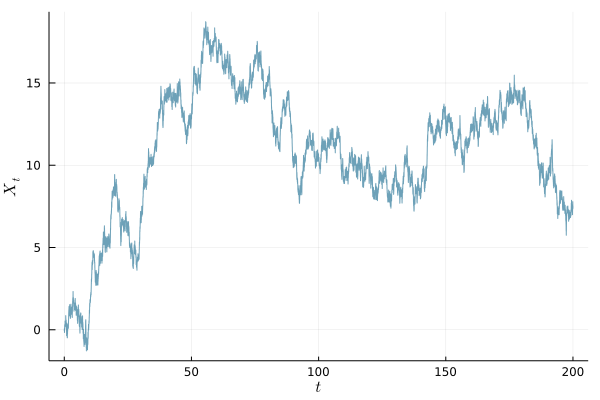

In [2]:
##   Defining a drift function

#drift function described in section 4 equation (13)
#in van der Meulen, Schauer & Van Zanten 2014
function drift_a(x)
    if  0<=x<2/3
        return 2/7-x-2/7*(1-3*x)*sqrt(abs(1-3*x))
    end
    if  2/3<=x<=1
        return -2/7+2/7*x
    end
end

function drift_b(x)
    #note the mod(x,1)
    #this makes the function 1 periodic
    return 12*(drift_a(mod(x,1))+0.05)
end


##   Simmulating from the SDE

# implement SDE dX_t = drift_b(X_t)dt + dW_t, 
# starting at zero till time 200.0, discretised 
# with precision 0.01.
model_sim = SDEModel(1.0,0.0,200.0,10^-2)

##   Define SDE
sde = SDE(drift_b,model_sim)

##   Sample from SDE
x_sim = rand(sde)


##   Plot path
path_plot = plot()
plot!(path_plot,x_sim.timeinterval, x_sim.samplevalues, legend = false, linecolor = dblue)
xlabel!("\$t\$")
ylabel!("\$X_t\$")

# Direct Computation of mean and variance

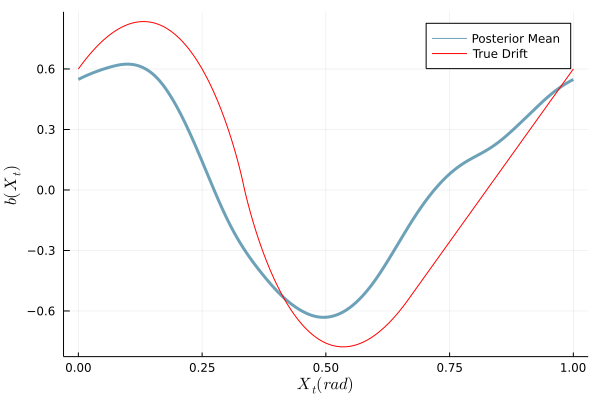

In [3]:
##   Direct Computation

##   Model
σ = 1.0 #diffusion
beginvalue = 0.0 #starting value
endtime = 200.0 #end time T
Δ = 200.0/20000 #increment delta

model = SDEModel(σ, beginvalue , endtime ,  Δ)

##   Prior

# number of terms in the series
# sum_k=1^J s*k^-2*Z_k*phi_k
J = 200


# distribution of theta in
# sum_j theta_j*phi_j
s = pi
distribution = GaussianVector(diagm([(s*0.5)*k^(-2) for k in 1.0:(J+1)]))

# Basis functions
# Fourier
Π = GaussianProcess(vcat([x ->1.0] , [fourier(k) for k in 1:J]), distribution)



##   Posterior

# distribution
postΠ = calculateposterior(Π, x_sim, model)

# posterior mean
post_drift_bayes = mean(postΠ)

## Plot

# x values [0,1]
xs = range(0,1,length = 500)

# plot posterior mean
bayes_post = plot(xs, post_drift_bayes.(xs), 
    linewidth = 3,
    linecolor = dblue,
    label = "Posterior Mean")
plot!(bayes_post, xs, drift_b.(xs),
    linecolor = :red,
    label = "True Drift")
xlabel!("\$X_t(rad)\$")
ylabel!("\$b(X_t)\$")

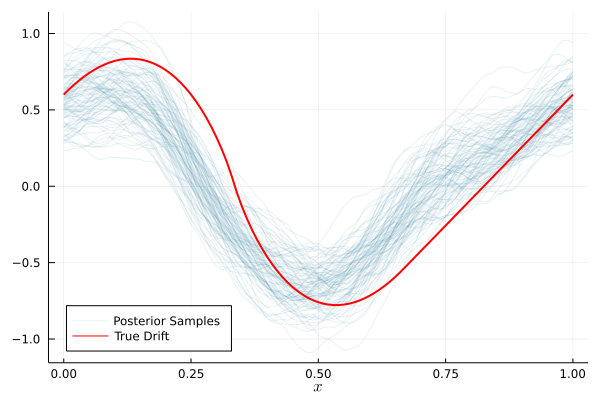

In [5]:
##   Sample N times from posterior and plot

#number of samples to draw
N = 100

#empty plot
sample_plot=plot()

x = 0.0:0.01:1.0

# Sample
for k in 1:N
#sample posterior
f = rand(postΠ)
    
#Plot Sample
plot!(sample_plot,x,f.(x),show=true, linecolor = dblue, alpha = 0.1, linewidth = 1, label = "")

#legend arguments
if k == 1
    plot!(sample_plot,x,f.(x),show=true, linecolor = dblue, 
            alpha = 0.1, linewidth = 1, label = "Posterior Samples")
end
end


#add the true drift to the sample plots
plot!(sample_plot,x,drift_b.(x), linecolor = RGBA(1,0,0,1), linewidth = 2, label = "True Drift",
legend=:bottomleft)
xlabel!("\$x\$")

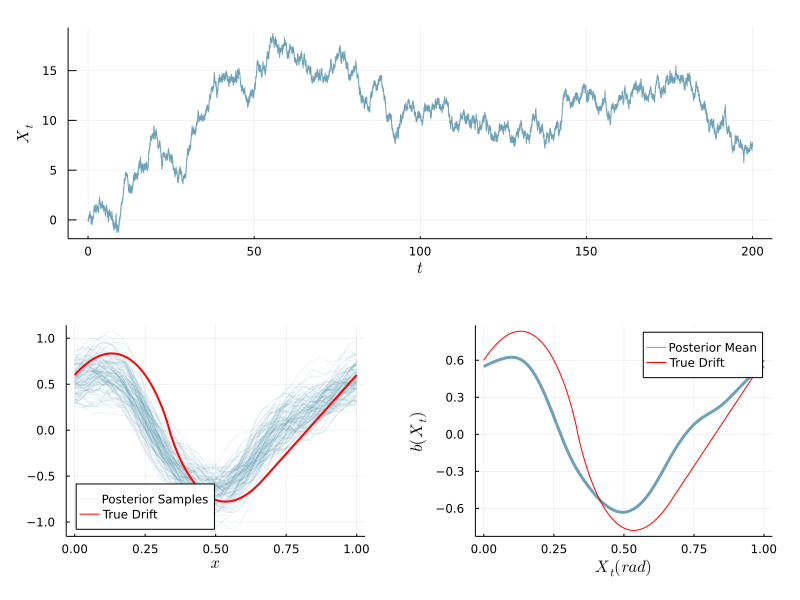

In [6]:
##   Collect in one plot
l = @layout [a ; b c]
full_bayes_plot = plot(path_plot,sample_plot, bayes_post , layout = l, size = (800,600),margin=5Plots.mm)

# MCMC

In [7]:
@nbinclude("MCMC.ipynb")

calc_mcmc_post_drift (generic function with 1 method)

In [8]:
#Number of iterations to make
N_step = 5000
#number of observations to use a burn in
burn = 1000
#maximum number of terms in the sum
#sum theta_k*phi_k
j_max = 200

#perform MCMC
mu_lst, j_lst = mcmc(x_sim, model, N_step, burn, j_max)

#calculate the posterior 
#mean vector
mcmc_post = mcmc_post_mean(mu_lst, N_step, burn)

#define the function
# sum theta_k*phi_k
mcmc_post_drift = calc_mcmc_post_drift(mcmc_post)

Step: 1
Step: 2
Step: 3
Step: 4
Step: 5
Step: 6
Step: 7
Step: 8
Step: 9
Step: 10
Step: 11
Step: 12
Step: 13
Step: 14
Step: 15
Step: 16
Step: 17
Step: 18
Step: 19
Step: 20
Step: 21
Step: 22
Step: 23
Step: 24
Step: 25
Step: 26
Step: 27
Step: 28
Step: 29
Step: 30
Step: 31
Step: 32
Step: 33
Step: 34
Step: 35
Step: 36
Step: 37
Step: 38
Step: 39
Step: 40
Step: 41
Step: 42
Step: 43
Step: 44
Step: 45
Step: 46
Step: 47
Step: 48
Step: 49
Step: 50
Step: 51
Step: 52
Step: 53
Step: 54
Step: 55
Step: 56
Step: 57
Step: 58
Step: 59
Step: 60
Step: 61
Step: 62
Step: 63
Step: 64
Step: 65
Step: 66
Step: 67
Step: 68
Step: 69
Step: 70
Step: 71
Step: 72
Step: 73
Step: 74
Step: 75
Step: 76
Step: 77
Step: 78
Step: 79
Step: 80
Step: 81
Step: 82
Step: 83
Step: 84
Step: 85
Step: 86
Step: 87
Step: 88
Step: 89
Step: 90
Step: 91
Step: 92
Step: 93
Step: 94
Step: 95
Step: 96
Step: 97
Step: 98
Step: 99
Step: 100
Step: 101
Step: 102
Step: 103
Step: 104
Step: 105
Step: 106
Step: 107
Step: 108
Step: 109
Step: 110
Step: 11

Step: 833
Step: 834
Step: 835
Step: 836
Step: 837
Step: 838
Step: 839
Step: 840
Step: 841
Step: 842
Step: 843
Step: 844
Step: 845
Step: 846
Step: 847
Step: 848
Step: 849
Step: 850
Step: 851
Step: 852
Step: 853
Step: 854
Step: 855
Step: 856
Step: 857
Step: 858
Step: 859
Step: 860
Step: 861
Step: 862
Step: 863
Step: 864
Step: 865
Step: 866
Step: 867
Step: 868
Step: 869
Step: 870
Step: 871
Step: 872
Step: 873
Step: 874
Step: 875
Step: 876
Step: 877
Step: 878
Step: 879
Step: 880
Step: 881
Step: 882
Step: 883
Step: 884
Step: 885
Step: 886
Step: 887
Step: 888
Step: 889
Step: 890
Step: 891
Step: 892
Step: 893
Step: 894
Step: 895
Step: 896
Step: 897
Step: 898
Step: 899
Step: 900
Step: 901
Step: 902
Step: 903
Step: 904
Step: 905
Step: 906
Step: 907
Step: 908
Step: 909
Step: 910
Step: 911
Step: 912
Step: 913
Step: 914
Step: 915
Step: 916
Step: 917
Step: 918
Step: 919
Step: 920
Step: 921
Step: 922
Step: 923
Step: 924
Step: 925
Step: 926
Step: 927
Step: 928
Step: 929
Step: 930
Step: 931
Step: 932


Step: 1594
Step: 1595
Step: 1596
Step: 1597
Step: 1598
Step: 1599
Step: 1600
Step: 1601
Step: 1602
Step: 1603
Step: 1604
Step: 1605
Step: 1606
Step: 1607
Step: 1608
Step: 1609
Step: 1610
Step: 1611
Step: 1612
Step: 1613
Step: 1614
Step: 1615
Step: 1616
Step: 1617
Step: 1618
Step: 1619
Step: 1620
Step: 1621
Step: 1622
Step: 1623
Step: 1624
Step: 1625
Step: 1626
Step: 1627
Step: 1628
Step: 1629
Step: 1630
Step: 1631
Step: 1632
Step: 1633
Step: 1634
Step: 1635
Step: 1636
Step: 1637
Step: 1638
Step: 1639
Step: 1640
Step: 1641
Step: 1642
Step: 1643
Step: 1644
Step: 1645
Step: 1646
Step: 1647
Step: 1648
Step: 1649
Step: 1650
Step: 1651
Step: 1652
Step: 1653
Step: 1654
Step: 1655
Step: 1656
Step: 1657
Step: 1658
Step: 1659
Step: 1660
Step: 1661
Step: 1662
Step: 1663
Step: 1664
Step: 1665
Step: 1666
Step: 1667
Step: 1668
Step: 1669
Step: 1670
Step: 1671
Step: 1672
Step: 1673
Step: 1674
Step: 1675
Step: 1676
Step: 1677
Step: 1678
Step: 1679
Step: 1680
Step: 1681
Step: 1682
Step: 1683
Step: 1684

Step: 2339
Step: 2340
Step: 2341
Step: 2342
Step: 2343
Step: 2344
Step: 2345
Step: 2346
Step: 2347
Step: 2348
Step: 2349
Step: 2350
Step: 2351
Step: 2352
Step: 2353
Step: 2354
Step: 2355
Step: 2356
Step: 2357
Step: 2358
Step: 2359
Step: 2360
Step: 2361
Step: 2362
Step: 2363
Step: 2364
Step: 2365
Step: 2366
Step: 2367
Step: 2368
Step: 2369
Step: 2370
Step: 2371
Step: 2372
Step: 2373
Step: 2374
Step: 2375
Step: 2376
Step: 2377
Step: 2378
Step: 2379
Step: 2380
Step: 2381
Step: 2382
Step: 2383
Step: 2384
Step: 2385
Step: 2386
Step: 2387
Step: 2388
Step: 2389
Step: 2390
Step: 2391
Step: 2392
Step: 2393
Step: 2394
Step: 2395
Step: 2396
Step: 2397
Step: 2398
Step: 2399
Step: 2400
Step: 2401
Step: 2402
Step: 2403
Step: 2404
Step: 2405
Step: 2406
Step: 2407
Step: 2408
Step: 2409
Step: 2410
Step: 2411
Step: 2412
Step: 2413
Step: 2414
Step: 2415
Step: 2416
Step: 2417
Step: 2418
Step: 2419
Step: 2420
Step: 2421
Step: 2422
Step: 2423
Step: 2424
Step: 2425
Step: 2426
Step: 2427
Step: 2428
Step: 2429

Step: 3103
Step: 3104
Step: 3105
Step: 3106
Step: 3107
Step: 3108
Step: 3109
Step: 3110
Step: 3111
Step: 3112
Step: 3113
Step: 3114
Step: 3115
Step: 3116
Step: 3117
Step: 3118
Step: 3119
Step: 3120
Step: 3121
Step: 3122
Step: 3123
Step: 3124
Step: 3125
Step: 3126
Step: 3127
Step: 3128
Step: 3129
Step: 3130
Step: 3131
Step: 3132
Step: 3133
Step: 3134
Step: 3135
Step: 3136
Step: 3137
Step: 3138
Step: 3139
Step: 3140
Step: 3141
Step: 3142
Step: 3143
Step: 3144
Step: 3145
Step: 3146
Step: 3147
Step: 3148
Step: 3149
Step: 3150
Step: 3151
Step: 3152
Step: 3153
Step: 3154
Step: 3155
Step: 3156
Step: 3157
Step: 3158
Step: 3159
Step: 3160
Step: 3161
Step: 3162
Step: 3163
Step: 3164
Step: 3165
Step: 3166
Step: 3167
Step: 3168
Step: 3169
Step: 3170
Step: 3171
Step: 3172
Step: 3173
Step: 3174
Step: 3175
Step: 3176
Step: 3177
Step: 3178
Step: 3179
Step: 3180
Step: 3181
Step: 3182
Step: 3183
Step: 3184
Step: 3185
Step: 3186
Step: 3187
Step: 3188
Step: 3189
Step: 3190
Step: 3191
Step: 3192
Step: 3193

Step: 3873
Step: 3874
Step: 3875
Step: 3876
Step: 3877
Step: 3878
Step: 3879
Step: 3880
Step: 3881
Step: 3882
Step: 3883
Step: 3884
Step: 3885
Step: 3886
Step: 3887
Step: 3888
Step: 3889
Step: 3890
Step: 3891
Step: 3892
Step: 3893
Step: 3894
Step: 3895
Step: 3896
Step: 3897
Step: 3898
Step: 3899
Step: 3900
Step: 3901
Step: 3902
Step: 3903
Step: 3904
Step: 3905
Step: 3906
Step: 3907
Step: 3908
Step: 3909
Step: 3910
Step: 3911
Step: 3912
Step: 3913
Step: 3914
Step: 3915
Step: 3916
Step: 3917
Step: 3918
Step: 3919
Step: 3920
Step: 3921
Step: 3922
Step: 3923
Step: 3924
Step: 3925
Step: 3926
Step: 3927
Step: 3928
Step: 3929
Step: 3930
Step: 3931
Step: 3932
Step: 3933
Step: 3934
Step: 3935
Step: 3936
Step: 3937
Step: 3938
Step: 3939
Step: 3940
Step: 3941
Step: 3942
Step: 3943
Step: 3944
Step: 3945
Step: 3946
Step: 3947
Step: 3948
Step: 3949
Step: 3950
Step: 3951
Step: 3952
Step: 3953
Step: 3954
Step: 3955
Step: 3956
Step: 3957
Step: 3958
Step: 3959
Step: 3960
Step: 3961
Step: 3962
Step: 3963

Step: 4625
Step: 4626
Step: 4627
Step: 4628
Step: 4629
Step: 4630
Step: 4631
Step: 4632
Step: 4633
Step: 4634
Step: 4635
Step: 4636
Step: 4637
Step: 4638
Step: 4639
Step: 4640
Step: 4641
Step: 4642
Step: 4643
Step: 4644
Step: 4645
Step: 4646
Step: 4647
Step: 4648
Step: 4649
Step: 4650
Step: 4651
Step: 4652
Step: 4653
Step: 4654
Step: 4655
Step: 4656
Step: 4657
Step: 4658
Step: 4659
Step: 4660
Step: 4661
Step: 4662
Step: 4663
Step: 4664
Step: 4665
Step: 4666
Step: 4667
Step: 4668
Step: 4669
Step: 4670
Step: 4671
Step: 4672
Step: 4673
Step: 4674
Step: 4675
Step: 4676
Step: 4677
Step: 4678
Step: 4679
Step: 4680
Step: 4681
Step: 4682
Step: 4683
Step: 4684
Step: 4685
Step: 4686
Step: 4687
Step: 4688
Step: 4689
Step: 4690
Step: 4691
Step: 4692
Step: 4693
Step: 4694
Step: 4695
Step: 4696
Step: 4697
Step: 4698
Step: 4699
Step: 4700
Step: 4701
Step: 4702
Step: 4703
Step: 4704
Step: 4705
Step: 4706
Step: 4707
Step: 4708
Step: 4709
Step: 4710
Step: 4711
Step: 4712
Step: 4713
Step: 4714
Step: 4715

#11 (generic function with 1 method)

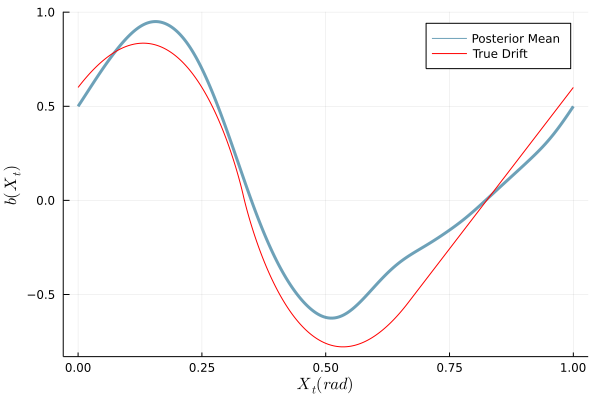

In [11]:
# plot posterior mean
mcmc_post_plot = plot(xs, mcmc_post_drift.(xs), 
    linewidth = 3,
    linecolor = dblue,
    label = "Posterior Mean")
plot!(mcmc_post_plot, xs, drift_b.(xs),
    linecolor = :red,
    label = "True Drift")
xlabel!("\$X_t(rad)\$")
ylabel!("\$b(X_t)\$")

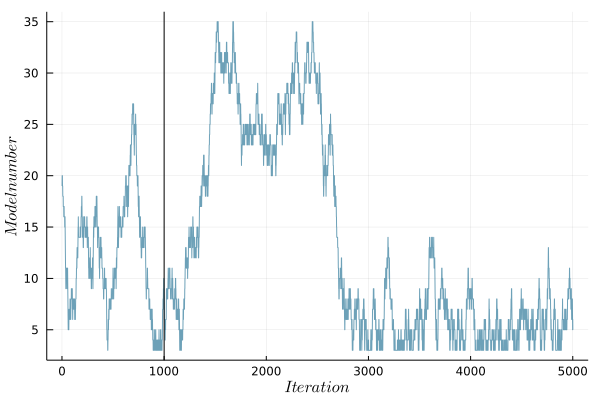

In [18]:
##   Plot models visited
j_lst2 = j_lst[1,:]

model_plot = plot(j_lst2, legend = false, color = dblue,)
vline!(model_plot, [1000], color = :black)
xlabel!("\$Iteration\$")
ylabel!("\$Model number\$")

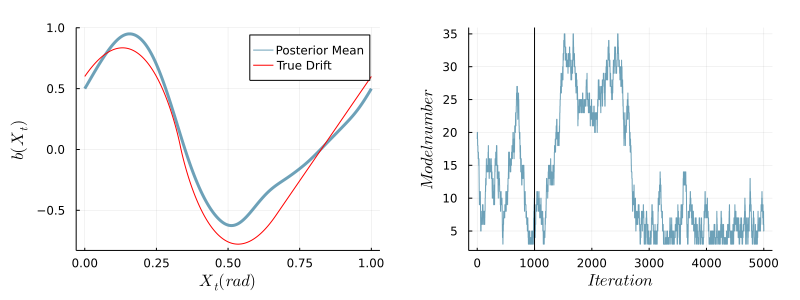

In [19]:
##   Collect in one plot
l = @layout [a  b ]
full_mcmc_plot = plot(mcmc_post_plot,model_plot, layout = l, size = (800,300),margin=5Plots.mm)

In [20]:
##   Save Figures
png(full_bayes_plot, "figures\\Bayes_plot_sim")
png(full_mcmc_plot, "figures\\MCMC_plot_sim")